<a href="https://colab.research.google.com/github/danielturg/Road2_AI_Course_Scripts/blob/main/HW2_AI_Course_Finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a code to build a deep learning algorithm to convert temperature measurements in farenheit to celsius.  create a dataset of degrees in c and their conversion in f. make it two seperate vectors, one of 10 measurements in c and the other of 10 conversions of them. the neural network is supposed to be able to receive a degree measurement in c and output it in f. the network needs to find a,b parameters as close as possible to the real values of the conversion formula. this is a regression problem. build it with 1 layer and 1 neuron, input a vector of celsius measurements and output a vector of farenheit. after building it check the error with mean square value, a learning step of 0.01 and use adam's optimization algorithm. train the network with 500 epochs. make a prediction for the response of a number not in the dataset. show the weights at the end of the training. show a graph of MSE  and epoch.

1/1 [==============================] - 0s 77ms/step
Predicted Fahrenheit temperature for 25.0°C: 50.40483856201172°F
Model Weights: [array([[1.8308909]], dtype=float32), array([4.6325636], dtype=float32)]


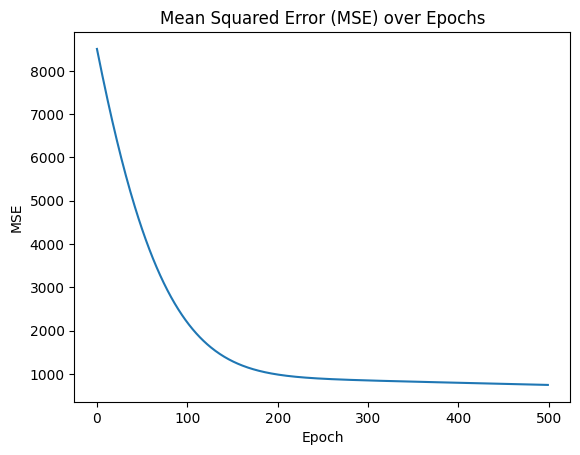

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a dataset
np.random.seed(42)

# Generate 10 random Celsius temperatures
celsius_temps = np.random.uniform(low=-100, high=100, size=10)

# Convert Celsius to Fahrenheit using the formula: F = C * 1.8 + 32
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build the neural network
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, verbose=0)

# Make a prediction for a new Celsius temperature not in the dataset
new_celsius_temp = np.array([25.0])
predicted_fahrenheit_temp = model.predict(new_celsius_temp)
print(f'Predicted Fahrenheit temperature for {new_celsius_temp[0]}°C: {predicted_fahrenheit_temp[0][0]}°F')

# Display the model weights
print(f'Model Weights: {model.get_weights()}')

# Plot the Mean Squared Error (MSE) over epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


now repeat everything to improve the network. give the network more neurons and more layers.

1/1 [==============================] - 0s 68ms/step
Predicted Fahrenheit temperature for 25.0°C: 77.06087493896484°F
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                32        
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


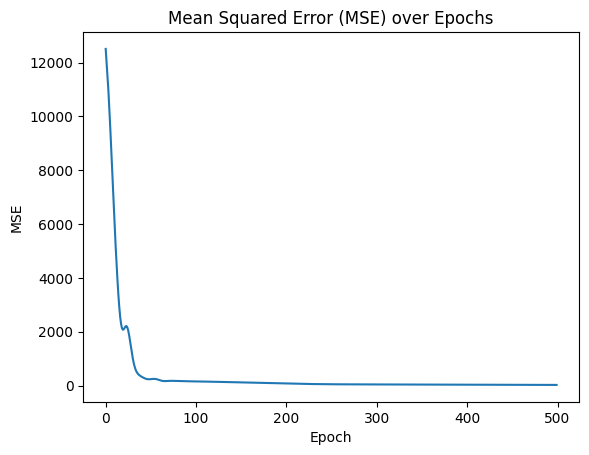

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a dataset
np.random.seed(42)

# Generate 10 random Celsius temperatures
celsius_temps = np.random.uniform(low=-100, high=100, size=10)

# Convert Celsius to Fahrenheit using the formula: F = C * 1.8 + 32
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build a more complex neural network
model = Sequential()
model.add(Dense(16, input_shape=(1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, verbose=0)

# Make a prediction for a new Celsius temperature not in the dataset
new_celsius_temp = np.array([25.0])
predicted_fahrenheit_temp = model.predict(new_celsius_temp)
print(f'Predicted Fahrenheit temperature for {new_celsius_temp[0]}°C: {predicted_fahrenheit_temp[0][0]}°F')

# Display the model summary
model.summary()

# Plot the Mean Squared Error (MSE) over epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


hould we have trained it with that many neurons if the actual formula only has 2 values?

1/1 [==============================] - 0s 49ms/step
Predicted Fahrenheit temperature for 25.0°C: 41.052032470703125°F
Layer Weights: [1.4629484], Layer Bias: 4.478320121765137


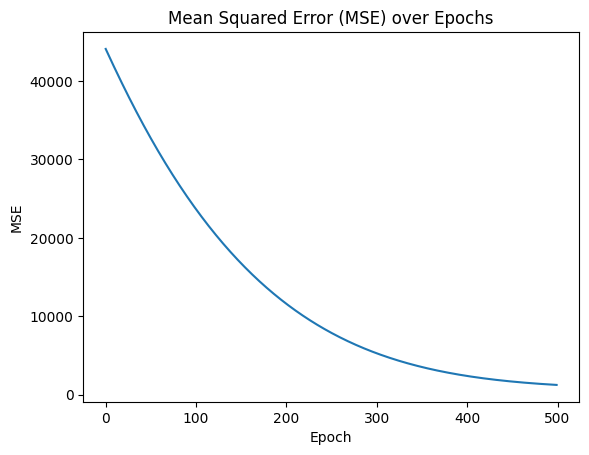

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a dataset
np.random.seed(42)
celsius_temps = np.random.uniform(low=-100, high=100, size=10)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build a simpler neural network
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, verbose=0)

# Make a prediction for a new Celsius temperature not in the dataset
new_celsius_temp = np.array([25.0])
predicted_fahrenheit_temp = model.predict(new_celsius_temp)
print(f'Predicted Fahrenheit temperature for {new_celsius_temp[0]}°C: {predicted_fahrenheit_temp[0][0]}°F')

# Display the model weights after training
layer_weights = model.layers[0].get_weights()[0][0]
layer_bias = model.layers[0].get_weights()[1][0]
print(f'Layer Weights: {layer_weights}, Layer Bias: {layer_bias}')

# Plot the Mean Squared Error (MSE) over epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


this one gives me worst results. how can you improve it by changing parameters while keeping it 1 layer 1 neuron?

1/1 [==============================] - 0s 41ms/step
Predicted Fahrenheit temperature for 25.0°C: -0.3959750533103943°F
Layer Weights: [-0.05486116], Layer Bias: 0.9755540490150452


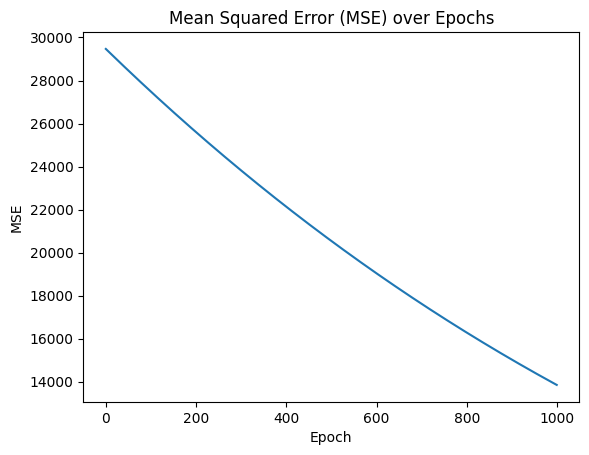

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a dataset
np.random.seed(42)
celsius_temps = np.random.uniform(low=-100, high=100, size=10)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build a simpler neural network
model = Sequential()
model.add(Dense(1, input_shape=(1,), kernel_initializer='glorot_normal'))  # Use glorot_normal initialization

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with more epochs
history = model.fit(celsius_temps, fahrenheit_temps, epochs=1000, verbose=0)

# Make a prediction for a new Celsius temperature not in the dataset
new_celsius_temp = np.array([25.0])
predicted_fahrenheit_temp = model.predict(new_celsius_temp)
print(f'Predicted Fahrenheit temperature for {new_celsius_temp[0]}°C: {predicted_fahrenheit_temp[0][0]}°F')

# Display the model weights after training
layer_weights = model.layers[0].get_weights()[0][0]
layer_bias = model.layers[0].get_weights()[1][0]
print(f'Layer Weights: {layer_weights}, Layer Bias: {layer_bias}')

# Plot the Mean Squared Error (MSE) over epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


that was even worse. undo the changes. perhaps we should use a larger training set?



1/1 [==============================] - 0s 60ms/step
Predicted Fahrenheit temperature for 25.0°C: 77.0°F
Layer Weights: [1.8000001], Layer Bias: 32.000003814697266


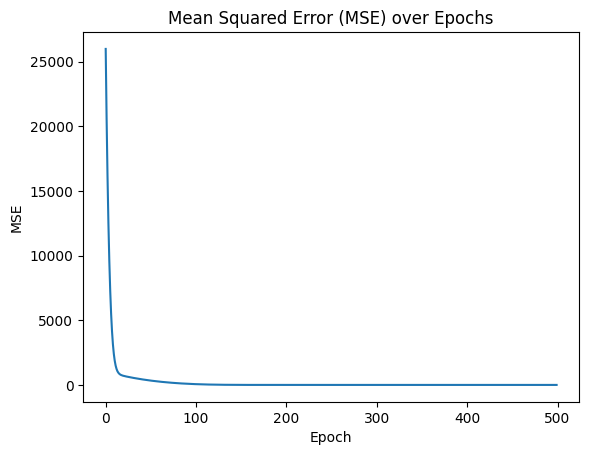

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a larger dataset
np.random.seed(42)
celsius_temps = np.random.uniform(low=-100, high=100, size=1000)
fahrenheit_temps = celsius_temps * 1.8 + 32

# Build a simpler neural network
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model with more epochs on the larger dataset
history = model.fit(celsius_temps, fahrenheit_temps, epochs=500, verbose=0)

# Make a prediction for a new Celsius temperature not in the dataset
new_celsius_temp = np.array([25.0])
predicted_fahrenheit_temp = model.predict(new_celsius_temp)
print(f'Predicted Fahrenheit temperature for {new_celsius_temp[0]}°C: {predicted_fahrenheit_temp[0][0]}°F')

# Display the model weights after training
layer_weights = model.layers[0].get_weights()[0][0]
layer_bias = model.layers[0].get_weights()[1][0]
print(f'Layer Weights: {layer_weights}, Layer Bias: {layer_bias}')

# Plot the Mean Squared Error (MSE) over epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()
